# Лекция: Визуализация данных с использованием Python

## Введение в анализ данных и визуализацию

Добро пожаловать на лекцию по визуализации данных! В этом занятии мы изучим различные методы визуализации данных, используя популярные библиотеки Python: **pandas**, **seaborn** и **matplotlib**.

### Цели лекции:
1. Освоить основные принципы визуализации данных
2. Изучить различные типы графиков и диаграмм
3. Понять, когда и какой тип визуализации использовать
4. Научиться интерпретировать результаты графиков

### Датасет Iris
В качестве примера мы будем использовать классический датасет **Iris** (Ирис), который содержит измерения трех видов цветов ириса:
- **Iris Setosa** (Ирис щетинистый)
- **Iris Versicolor** (Ирис разноцветный) 
- **Iris Virginica** (Ирис виргинский)

Для каждого цветка записаны четыре характеристики:
- Длина чашелистика (SepalLengthCm)
- Ширина чашелистика (SepalWidthCm)
- Длина лепестка (PetalLengthCm)
- Ширина лепестка (PetalWidthCm)

## Ячейка 1: Импорт библиотек и загрузка данных

### Теория:
В данной ячейке мы выполняем несколько критически важных действий для начала работы с данными:

**1. Импорт pandas:**
- **pandas** - это основная библиотека для анализа данных в Python
- Обеспечивает структуры данных (DataFrame, Series) для эффективной работы с табличными данными
- Предоставляет функции для чтения различных форматов файлов (CSV, Excel, JSON и др.)

**2. Импорт seaborn:**
- **seaborn** - высокоуровневая библиотека для статистической визуализации
- Построена поверх matplotlib, но предоставляет более простой и элегантный интерфейс
- Автоматически применяет красивые стили и цветовые схемы
- Особенно хороша для статистических графиков

**3. Импорт matplotlib.pyplot:**
- **matplotlib** - базовая библиотека для создания графиков в Python
- pyplot предоставляет интерфейс, похожий на MATLAB
- Используется как основа для более сложных библиотек визуализации

**4. Настройка предупреждений:**
- `warnings.filterwarnings("ignore")` подавляет предупреждения
- Полезно для чистоты вывода в учебных целях

**5. Загрузка данных:**
- `pd.read_csv()` читает CSV файл и создает DataFrame
- DataFrame - это двумерная структура данных с именованными столбцами
- `.head()` показывает первые 5 строк для быстрого ознакомления с данными

In [ ]:
# Сначала импортируем pandas - библиотеку для обработки данных и работы с CSV файлами
import pandas as pd

# Также импортируем seaborn - библиотеку для создания графиков в Python
import warnings # текущая версия seaborn генерирует множество предупреждений, которые мы игнорируем
warnings.filterwarnings("ignore")
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="white", color_codes=True)

# Далее загружаем датасет цветов Ириса, который находится в текущей директории "./"
iris = pd.read_csv("./Iris.csv") # датасет iris теперь является DataFrame в pandas

# Посмотрим, что содержится в данных iris - Jupyter notebooks выводят результат последнего выполненного действия
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
iris["Species"].value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

## Ячейка 2: Анализ распределения классов

### Теория:
Перед началом визуализации важно понять структуру наших данных:

**1. Метод value_counts():**
- Подсчитывает количество уникальных значений в столбце
- Возвращает результат в порядке убывания частоты
- Критически важен для понимания сбалансированности датасета

**2. Важность проверки баланса классов:**
- **Сбалансированный датасет:** все классы представлены примерно одинаково
- **Несбалансированный датасет:** некоторые классы встречаются намного чаще других
- Влияет на выбор методов машинного обучения и интерпретацию результатов

**3. Ожидаемый результат:**
В датасете Iris каждый из трех видов представлен 50 образцами, что делает его идеально сбалансированным для обучения.

<Axes: xlabel='SepalLengthCm', ylabel='SepalWidthCm'>

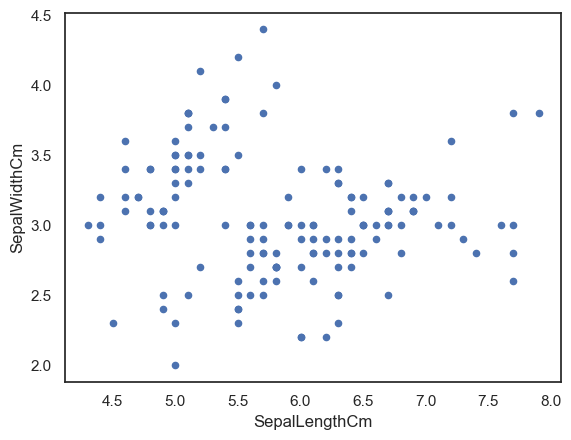

In [ ]:
# Первый способ построения графиков - использование расширения .plot из pandas dataframes
# Мы используем это для создания диаграммы рассеяния характеристик Ириса.
iris.plot(kind="scatter", x="SepalLengthCm", y="SepalWidthCm")

## Ячейка 3: Базовая диаграмма рассеяния с pandas

### Теория:
Это наш первый шаг в мир визуализации данных.

**1. Диаграмма рассеяния (Scatter Plot):**
- Показывает взаимосвязь между двумя непрерывными переменными
- Каждая точка представляет один образец данных
- Позволяет выявить корреляции, выбросы и паттерны

**2. Метод .plot() в pandas:**
- Встроенная функциональность pandas для быстрой визуализации
- Основана на matplotlib
- Параметр `kind="scatter"` создает диаграмму рассеяния
- Параметры `x` и `y` определяют оси

**3. Что мы анализируем:**
- **SepalLengthCm** (длина чашелистика) по оси X
- **SepalWidthCm** (ширина чашелистика) по оси Y
- Ищем взаимосвязь между размерами чашелистика

**4. Ограничения этого графика:**
- Не показывает, к какому виду принадлежит каждая точка
- Сложно выявить группы или кластеры

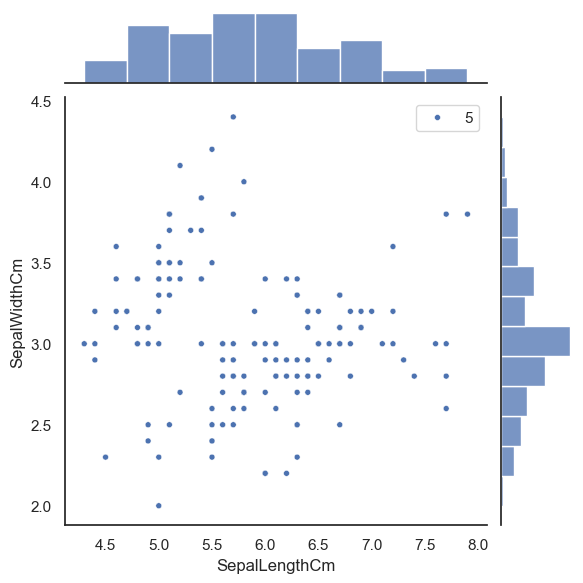

In [ ]:
# Мы также можем использовать библиотеку seaborn для создания похожего графика
# jointplot в seaborn показывает двумерные диаграммы рассеяния и одномерные гистограммы на одном рисунке
sns.jointplot(x="SepalLengthCm", y="SepalWidthCm", data=iris, size=5)

## Ячейка 4: Улучшенная визуализация с seaborn jointplot

### Теория:
Переходим к более мощным инструментам визуализации.

**1. seaborn.jointplot:**
- **Многофункциональный график** - объединяет несколько типов визуализации
- **Центральная часть:** диаграмма рассеяния (основная взаимосвязь)
- **Верхний график:** гистограмма распределения переменной X
- **Правый график:** гистограмма распределения переменной Y

**2. Преимущества jointplot:**
- **Комплексный анализ:** одновременно видим корреляцию и распределения
- **Автоматическое размещение:** seaborn автоматически создает красивый макет
- **Статистическая информация:** может включать коэффициенты корреляции

**3. Параметры:**
- `x`, `y`: переменные для анализа
- `data`: источник данных (DataFrame)
- `size`: размер графика (в новых версиях заменен на `height`)

**4. Интерпретация:**
- **Основной график:** ищем линейные или нелинейные зависимости
- **Гистограммы:** оцениваем форму распределения (нормальное, скошенное, мультимодальное)

**Примечание:** В новых версиях seaborn параметр `size` заменен на `height`.

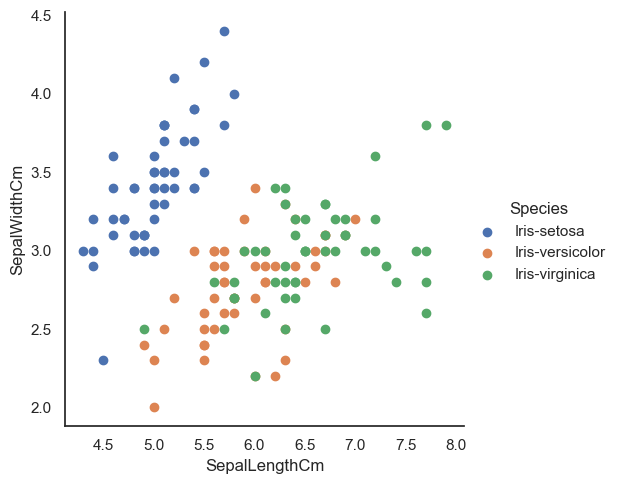

In [ ]:
# Одна часть информации, отсутствующая в графиках выше - это к какому виду принадлежит каждое растение
# Мы используем FacetGrid из seaborn для окрашивания диаграммы рассеяния по видам
sns.FacetGrid(iris, hue="Species", height=5) \
   .map(plt.scatter, "SepalLengthCm", "SepalWidthCm") \
   .add_legend()

## Ячейка 5: Цветовое кодирование с FacetGrid

### Теория:
Решаем главную проблему предыдущих графиков - отсутствие информации о видах.

**1. seaborn.FacetGrid:**
- **Мощный инструмент** для создания множественных графиков
- **Параметр `hue`:** окрашивает точки по категориальной переменной
- **Метод `.map()`:** применяет функцию построения графика
- **Метод `.add_legend()`:** добавляет легенду для цветов

**2. Преимущества цветового кодирования:**
- **Разделение по группам:** каждый вид имеет свой цвет
- **Выявление паттернов:** можем увидеть кластеры и различия между видами
- **Визуальная четкость:** сразу понятно, какие точки к какому виду относятся

**3. Техническая конструкция:**
```python
sns.FacetGrid(iris, hue="Species", height=5) \
   .map(plt.scatter, "SepalLengthCm", "SepalWidthCm") \
   .add_legend()
```
- **Обратный слэш `\`:** позволяет разбить код на несколько строк
- **Цепочка методов:** каждый метод возвращает объект для следующего вызова

**4. Ожидаемые результаты:**
- Три четко различимых группы точек разных цветов
- Возможное разделение между видами по размерам чашелистика

<Axes: xlabel='Species', ylabel='PetalLengthCm'>

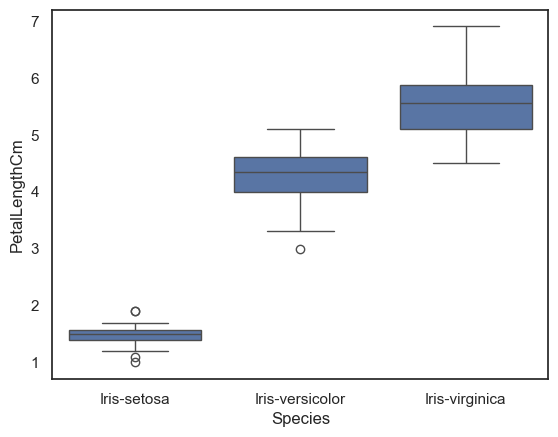

In [ ]:
# Мы можем рассмотреть отдельную характеристику в Seaborn через коробчатую диаграмму (boxplot)
sns.boxplot(x="Species", y="PetalLengthCm", data=iris)

## Ячейка 6: Коробчатые диаграммы (Box Plots)

### Теория:
Переходим к анализу распределения отдельных характеристик по группам.

**1. Коробчатая диаграмма (Box Plot):**
- **Мощный инструмент** для анализа статистического распределения
- Показывает **пять ключевых статистик:**
  - Минимум (нижний "ус")
  - Первый квартиль Q1 (нижняя граница коробки)
  - Медиана Q2 (линия внутри коробки)
  - Третий квартиль Q3 (верхняя граница коробки)
  - Максимум (верхний "ус")
- **Выбросы:** точки за пределами "усов"

**2. Интерпретация элементов:**
- **Коробка:** содержит 50% данных (межквартильный размах IQR)
- **Линия в коробке:** медиана (50-й процентиль)
- **Высота коробки:** изменчивость данных
- **Симметрия:** форма распределения

**3. Параметры seaborn.boxplot:**
- `x="Species"`: категориальная переменная (группы)
- `y="PetalLengthCm"`: численная переменная для анализа
- `data=iris`: источник данных

**4. Что мы анализируем:**
- **Различия между видами** по длине лепестка
- **Вариабельность внутри групп**
- **Наличие выбросов**
- **Перекрытие распределений между видами**

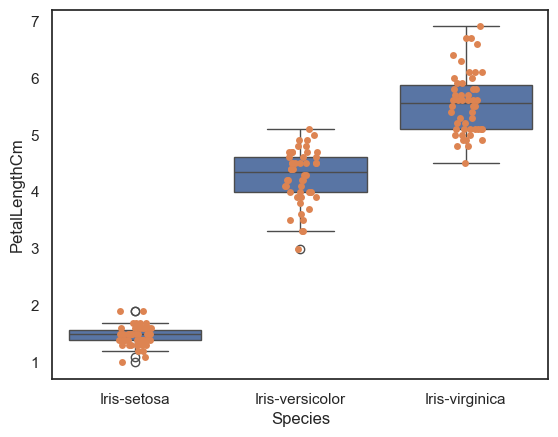

In [ ]:
# Один способ расширить этот график - добавить слой отдельных точек поверх него
# через stripplot из Seaborn
# 
# Мы используем jitter=True, чтобы все точки не располагались в одну вертикальную линию
# над видами
#
# Сохранение результирующих осей как ax каждый раз приводит к тому, что результирующий график
# отображается поверх предыдущих осей
ax = sns.boxplot(x="Species", y="PetalLengthCm", data=iris)
ax = sns.stripplot(x="Species", y="PetalLengthCm", data=iris, jitter=True, edgecolor="gray")

## Ячейка 7: Комбинированная визуализация - Box Plot + Strip Plot

### Теория:
Объединяем два типа графиков для получения более полной картины.

**1. Концепция слоистой визуализации:**
- **Базовый слой:** коробчатая диаграмма (статистическое резюме)
- **Дополнительный слой:** strip plot (индивидуальные точки)
- **Синергия:** статистика + детальные данные

**2. seaborn.stripplot:**
- Показывает **каждую точку данных** индивидуально
- **Параметр `jitter=True`:** добавляет случайное смещение по горизонтали
- **Цель jitter:** избежать наложения точек в одну линию
- **`edgecolor="gray"`:** добавляет границы точкам для лучшей видимости

**3. Техника наложения графиков:**
```python
ax = sns.boxplot(...)  # Создаем базовый график
ax = sns.stripplot(..., ax=ax)  # Добавляем поверх него
```
- **Переменная `ax`:** сохраняет ссылку на оси графика
- **Повторное использование осей:** позволяет комбинировать графики

**4. Преимущества комбинированного подхода:**
- **Статистическое резюме** от boxplot
- **Полная картина данных** от stripplot
- **Выявление паттернов** в распределении точек
- **Обнаружение выбросов** и их природы

**5. Практическое применение:**
- Особенно полезно для **небольших датасетов**
- Помогает понять **плотность распределения**
- Выявляет **мультимодальность** (несколько пиков)

<Axes: xlabel='Species', ylabel='PetalLengthCm'>

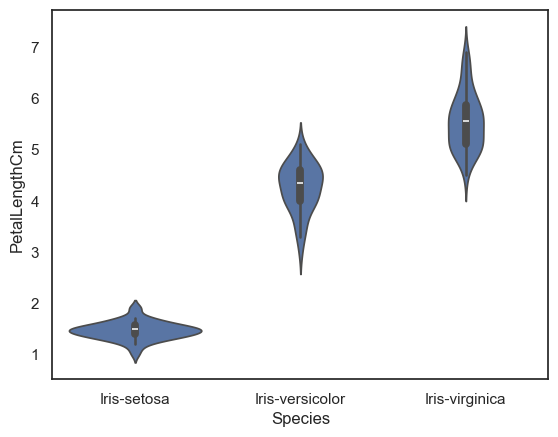

In [ ]:
# Скрипичная диаграмма (violin plot) объединяет преимущества двух предыдущих графиков и упрощает их
# Более плотные области данных шире, а более разреженные уже в скрипичной диаграмме
sns.violinplot(x="Species", y="PetalLengthCm", data=iris)

## Ячейка 8: Скрипичные диаграммы (Violin Plots)

### Теория:
Элегантное решение, объединяющее преимущества предыдущих методов.

**1. Что такое скрипичная диаграмма:**
- **Комбинирует** box plot и kernel density estimation (KDE)
- **Форма "скрипки":** показывает плотность распределения
- **Ширина в каждой точке:** пропорциональна количеству наблюдений
- **Симметричное отображение:** зеркальная плотность по обе стороны

**2. Анатомия violin plot:**
- **Центральная часть:** содержит элементы box plot (медиана, квартили)
- **Контур:** показывает оценку плотности вероятности
- **Широкие области:** больше точек данных
- **Узкие области:** меньше точек данных

**3. Преимущества violin plots:**
- **Информативность:** больше информации, чем box plot
- **Компактность:** проще для восприятия, чем комбинированные графики
- **Визуальная привлекательность:** эстетически приятные
- **Выявление модальности:** показывает несколько пиков в распределении

**4. Когда использовать:**
- **Средние и большие датасеты** (для KDE нужно достаточно точек)
- **Сравнение распределений** между группами
- **Анализ формы распределения** (нормальное, скошенное, бимодальное)

**5. Интерпретация:**
- **Симметричная скрипка:** нормальное распределение
- **Скошенная скрипка:** асимметричное распределение
- **Множественные "вздутия":** мультимодальное распределение

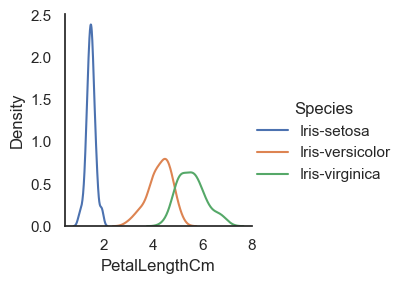

In [ ]:
# Последний график seaborn, полезный для изучения одномерных зависимостей - это kdeplot,
# который создает и визуализирует оценку плотности ядра базовой характеристики
sns.FacetGrid(iris, hue="Species") \
   .map(sns.kdeplot, "PetalLengthCm") \
   .add_legend()

## Ячейка 9: Оценка плотности ядра (Kernel Density Estimation)

### Теория:
Углубляемся в анализ распределений с помощью KDE.

**1. Kernel Density Estimation (KDE):**
- **Статистический метод** для оценки функции плотности вероятности
- **Сглаживание гистограммы:** создает непрерывную кривую из дискретных данных
- **Ядро (kernel):** функция (обычно гауссовская), применяемая к каждой точке
- **Ширина полосы (bandwidth):** параметр сглаживания

**2. Математическая основа:**
- Каждая точка данных представляется как **маленькая кривая**
- **Суммирование всех кривых** дает итоговую оценку плотности
- **Автоматический выбор** оптимальной ширины полосы

**3. FacetGrid с kdeplot:**
```python
sns.FacetGrid(iris, hue="Species") \
   .map(sns.kdeplot, "PetalLengthCm") \
   .add_legend()
```
- **Отдельная кривая** для каждого вида
- **Цветовое кодирование** по видам
- **Наложение кривых** для сравнения

**4. Интерпретация KDE графиков:**
- **Высота кривой:** относительная плотность вероятности
- **Ширина кривой:** разброс данных
- **Количество пиков:** модальность распределения
- **Перекрытие кривых:** схожесть между группами

**5. Преимущества KDE:**
- **Плавность:** нет артефактов бинирования как в гистограммах
- **Сравнимость:** легко сравнивать распределения
- **Статистическая обоснованность:** теоретически корректный метод

**6. Практические выводы:**
- **Разделимость классов:** минимальное перекрытие = хорошая разделимость
- **Оптимальные признаки:** для классификации

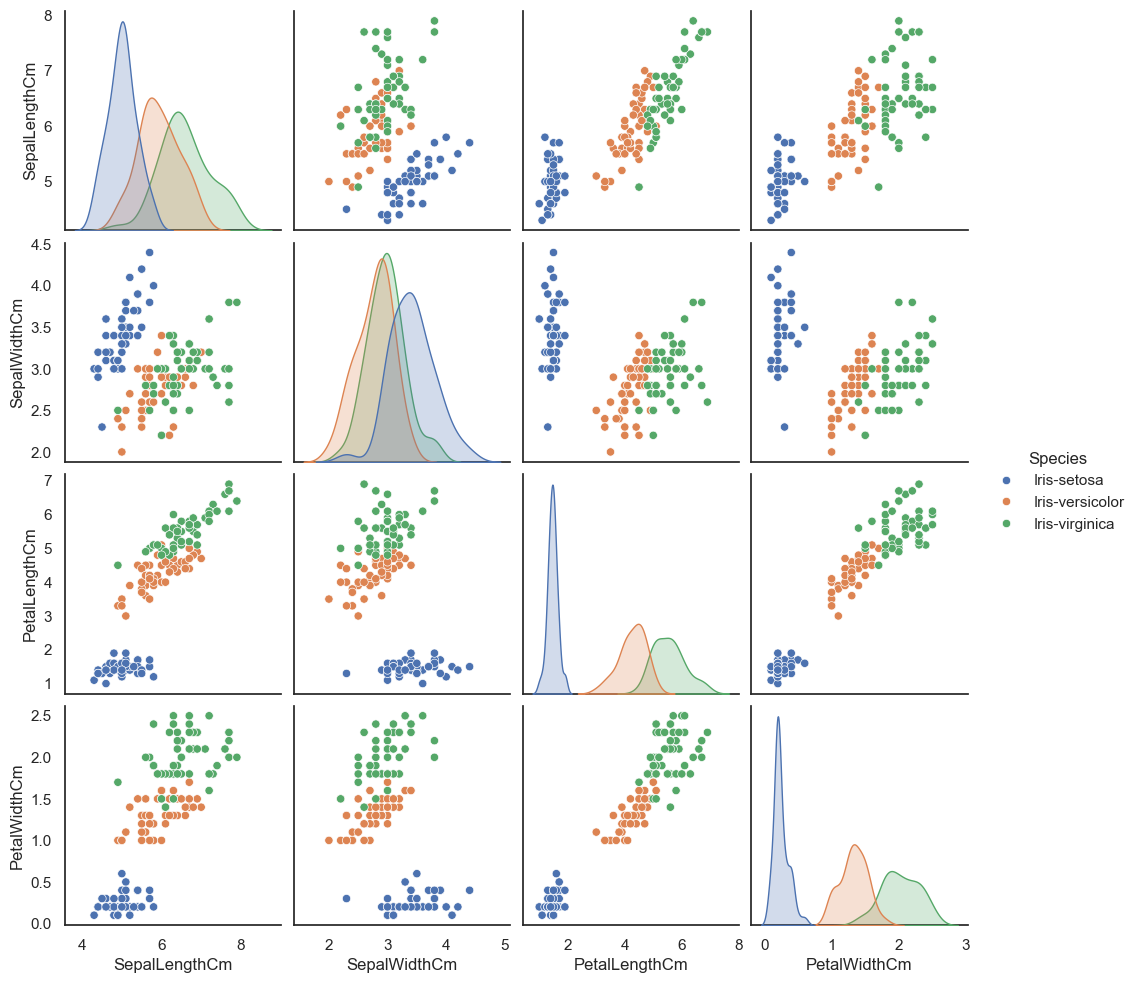

In [ ]:
# Еще один полезный график seaborn - это pairplot, который показывает двумерную зависимость
# между каждой парой характеристик
# 
# Из pairplot мы увидим, что вид Iris-setosa отделен от двух других
# во всех комбинациях характеристик
sns.pairplot(iris.drop("Id", axis=1), hue="Species")

## Ячейка 10: Парные графики (Pair Plots) - Многомерный анализ

### Теория:
Переходим к анализу взаимосвязей между всеми парами признаков.

**1. seaborn.pairplot - мощь многомерного анализа:**
- **Матрица графиков:** каждая ячейка показывает взаимосвязь между двумя переменными
- **Диагональные элементы:** распределение отдельных переменных (гистограммы)
- **Внедиагональные элементы:** диаграммы рассеяния между парами переменных
- **Цветовое кодирование:** `hue="Species"` окрашивает по видам

**2. Структура матрицы:**
```
        Sepal_Length  Sepal_Width  Petal_Length  Petal_Width
Sepal_Length   [hist]    [scatter]    [scatter]    [scatter]
Sepal_Width   [scatter]   [hist]      [scatter]    [scatter]
Petal_Length  [scatter]  [scatter]     [hist]      [scatter]
Petal_Width   [scatter]  [scatter]    [scatter]     [hist]
```

**3. Удаление столбца Id:**
- `iris.drop("Id", axis=1)`: удаляем неинформативный столбец
- **axis=1:** удаление по столбцам (axis=0 для строк)
- **Причина:** Id не несет аналитической ценности

**4. Что мы ищем:**
- **Линейные корреляции:** прямые или обратные зависимости
- **Нелинейные паттерны:** кривые зависимости
- **Кластеры:** группировка точек одного цвета
- **Разделимость классов:** четкое разделение между цветами

**5. Ключевые наблюдения в датасете Iris:**
- **Iris Setosa:** четко отделяется от остальных видов
- **Versicolor и Virginica:** частично перекрываются
- **Лучшие разделяющие признаки:** обычно связанные с лепестками
- **Корреляции:** между длиной и шириной внутри одного органа

**6. Практическое применение:**
- **Feature selection:** выбор наиболее информативных признаков
- **Проектирование моделей:** понимание сложности задачи классификации
- **Исследовательский анализ:** быстрый обзор всех взаимосвязей

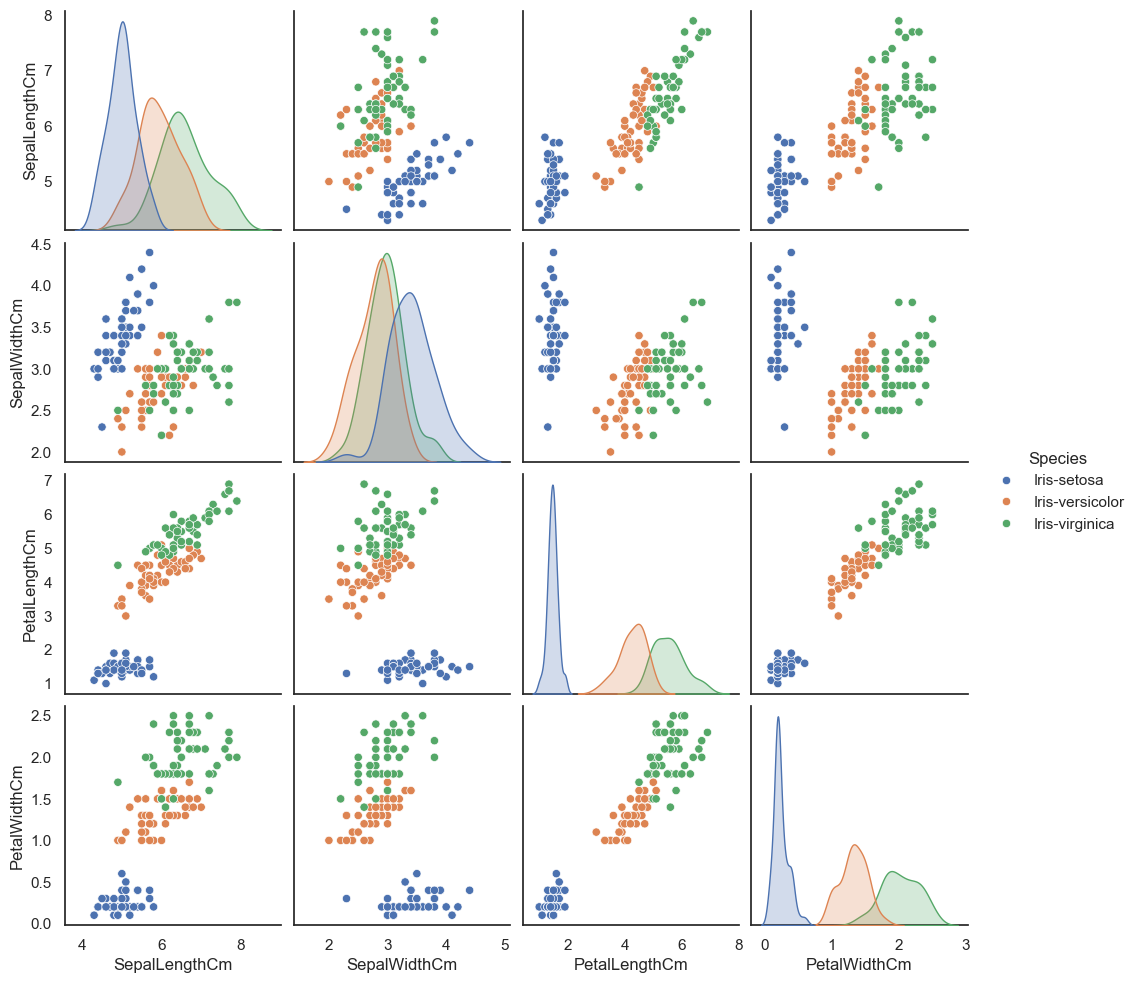

In [ ]:
# Диагональные элементы в pairplot по умолчанию показывают гистограмму
# Мы можем обновить эти элементы для отображения других вещей, например kde
sns.pairplot(iris.drop("Id", axis=1), hue="Species", diag_kind="kde")

## Ячейка 11: Настройка диагональных элементов в Pair Plot

### Теория:
Демонстрируем гибкость pairplot через настройку диагональных элементов.

**1. Параметр diag_kind:**
- **По умолчанию:** `diag_kind="hist"` (гистограммы)
- **Альтернатива:** `diag_kind="kde"` (оценка плотности ядра)
- **Цель:** лучшее представление распределений

**2. Сравнение hist vs kde на диагонали:**

**Гистограммы (`diag_kind="hist"`):**
- **Дискретные столбцы:** показывают частоты в интервалах
- **Зависят от количества bins:** может скрывать или создавать артефакты
- **Простота интерпретации:** легко понять распределение
- **Подходят:** для больших датасетов

**KDE (`diag_kind="kde"`):**
- **Плавные кривые:** непрерывная оценка плотности
- **Нет зависимости от bins:** более стабильная картина
- **Лучше для сравнения:** кривые легче сравнивать между группами
- **Подходят:** для анализа формы распределения

**3. Практические соображения:**
- **KDE более информативен** для многоклассовых задач
- **Лучше показывает перекрытия** между классами
- **Эстетически привлекательней** для презентаций

**4. Влияние на анализ:**
- **Выбор diag_kind** влияет на восприятие данных
- **KDE может выявить мультимодальность** лучше гистограмм
- **Комбинированный анализ:** стоит попробовать оба варианта

array([[<Axes: title={'center': 'PetalLengthCm'}, xlabel='[Species]'>,
        <Axes: title={'center': 'PetalWidthCm'}, xlabel='[Species]'>],
       [<Axes: title={'center': 'SepalLengthCm'}, xlabel='[Species]'>,
        <Axes: title={'center': 'SepalWidthCm'}, xlabel='[Species]'>]],
      dtype=object)

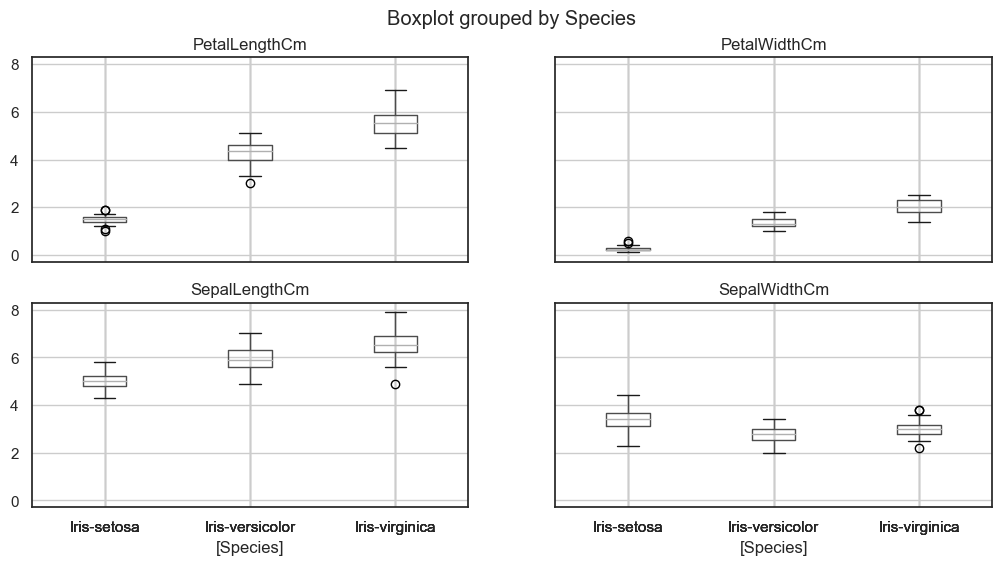

In [ ]:
# Теперь, когда мы рассмотрели seaborn, давайте вернемся к тем, которые мы можем создать с помощью Pandas
# Мы можем быстро создать коробчатую диаграмму с Pandas для каждой характеристики, разделенной по видам
iris.drop("Id", axis=1).boxplot(by="Species", figsize=(12, 6))

## Ячейка 12: Возвращение к pandas - множественные Box Plots

### Теория:
Демонстрируем встроенные возможности pandas для быстрого анализа.

**1. Метод .boxplot() в pandas:**
- **Встроенная функциональность:** не требует дополнительных библиотек
- **Параметр `by`:** группировка по категориальной переменной
- **Автоматическое создание:** subplot для каждой численной переменной
- **Параметр `figsize`:** контроль размера общего графика

**2. Структура результата:**
```
[SepalLengthCm]  [SepalWidthCm]
[PetalLengthCm]  [PetalWidthCm]
```
- **Четыре отдельных subplot:** по одному для каждой характеристики
- **Группировка по Species:** три коробки в каждом subplot
- **Единая шкала:** удобно сравнивать между переменными

**3. Преимущества pandas.boxplot:**
- **Скорость создания:** одна строка кода
- **Обзорность:** все переменные сразу
- **Стандартизация:** одинаковый стиль для всех графиков
- **Интеграция:** работает напрямую с DataFrame

**4. Сравнение с seaborn:**
- **pandas:** быстро, просто, функционально
- **seaborn:** красиво, гибко, продвинуто
- **Выбор зависит от задач:** исследование vs презентация

**5. Параметр figsize=(12, 6):**
- **Ширина:** 12 дюймов (подходит для четырех subplot)
- **Высота:** 6 дюймов (достаточно для box plots)
- **Соотношение сторон:** оптимально для множественных графиков

**6. Практическое применение:**
- **Быстрая диагностика:** первичный анализ всех переменных
- **Выявление выбросов:** во всех переменных одновременно
- **Сравнение масштабов:** понимание различий в единицах измерения

<Axes: >

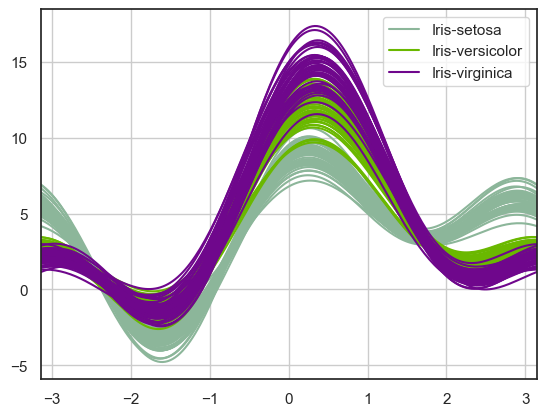

In [ ]:
# Одна классная более сложная техника, доступная в pandas, называется Кривые Эндрюса
# Кривые Эндрюса включают использование атрибутов образцов как коэффициентов для рядов Фурье
# и затем их построение
from pandas.plotting import andrews_curves
andrews_curves(iris.drop("Id", axis=1), "Species")

## Ячейка 13: Кривые Эндрюса - продвинутая многомерная визуализация

### Теория:
Знакомимся с одним из самых изощренных методов многомерной визуализации.

**1. Математические основы кривых Эндрюса:**
- **Преобразование Фурье:** каждая точка данных превращается в функцию
- **Формула:** f(t) = x₁/√2 + x₂sin(t) + x₃cos(t) + x₄sin(2t) + x₅cos(2t) + ...
- **Параметр t:** изменяется от -π до π
- **Результат:** каждая строка данных = одна кривая

**2. Принцип работы:**
- **Многомерные данные → функции:** каждый образец становится кривой
- **Сохранение расстояний:** близкие точки → похожие кривые
- **Цветовое кодирование:** кривые окрашиваются по классам
- **Визуальные паттерны:** группы образуют кластеры похожих кривых

**3. Интерпретация Andrews Curves:**
- **Параллельные кривые:** похожие образцы
- **Пересекающиеся кривые:** различающиеся образцы
- **Группы кривых:** кластеры одного класса
- **Разделение групп:** различимость классов

**4. Преимущества метода:**
- **Сохранение многомерной структуры:** не теряется информация
- **Выявление кластеров:** группы видны визуально
- **Обнаружение выбросов:** аномальные кривые выделяются
- **Математическая обоснованность:** теоретически корректный подход

**5. Ограничения:**
- **Сложность интерпретации:** требует навыка чтения
- **Перекрытие кривых:** может затруднять анализ
- **Зависимость от порядка признаков:** влияет на форму кривых

**6. Применение в датасете Iris:**
- **Ожидаемый результат:** три четко различимых группы кривых
- **Setosa:** должна сильно отличаться от других
- **Versicolor/Virginica:** могут частично перекрываться

**7. Практическое значение:**
- **Исследовательский анализ:** понимание структуры данных
- **Проверка качества кластеризации:** визуальная валидация
- **Демонстрационные цели:** эффектная презентация результатов

<Axes: >

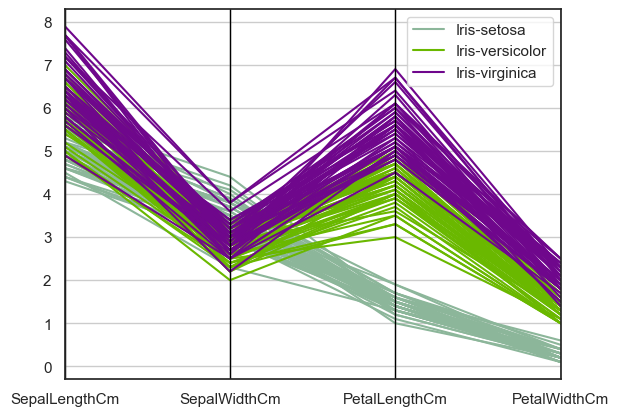

In [ ]:
# Еще одна техника многомерной визуализации pandas - это parallel_coordinates
# Параллельные координаты строят каждую характеристику в отдельном столбце и затем рисуют линии,
# соединяющие характеристики для каждого образца данных
from pandas.plotting import parallel_coordinates
parallel_coordinates(iris.drop("Id", axis=1), "Species")

## Ячейка 14: Параллельные координаты - геометрический подход

### Теория:
Изучаем классический метод многомерной визуализации.

**1. Концепция параллельных координат:**
- **Геометрическая идея:** каждый признак = вертикальная ось
- **Размещение осей:** параллельно друг другу
- **Соединение точек:** линии связывают значения одного образца
- **Многомерность → 2D:** сведение n-мерного пространства к плоскости

**2. Структура графика:**
```
Sepal_Length  Sepal_Width  Petal_Length  Petal_Width
     |             |            |            |
     |             |            |            |
     |             |            |            |
```
- **Вертикальные оси:** каждый столбец данных
- **Горизонтальные линии:** каждая строка данных (образец)
- **Нормализация:** часто оси приводятся к одному масштабу

**3. Чтение параллельных координат:**
- **Параллельные линии:** образцы с похожими значениями
- **Пересекающиеся линии:** образцы с различными паттернами
- **Группы линий:** кластеры похожих образцов
- **Цветовое кодирование:** различение классов

**4. Преимущества метода:**
- **Интуитивность:** легко понять принцип
- **Масштабируемость:** работает с любым количеством признаков
- **Выявление корреляций:** видны зависимости между соседними осями
- **Обнаружение выбросов:** аномальные линии выделяются

**5. Недостатки:**
- **Порядок осей важен:** влияет на восприятие корреляций
- **Перекрытие линий:** может затруднять анализ
- **Сложность при многих признаках:** график становится перегруженным

**6. Анализ в контексте Iris:**
- **Три цветовые группы:** соответствующие видам
- **Паттерны внутри групп:** схожесть образцов одного вида
- **Различия между группами:** разные траектории линий
- **Критические признаки:** оси, где группы сильно расходятся

**7. Практические применения:**
- **Feature engineering:** понимание важности признаков
- **Outlier detection:** выявление аномальных образцов
- **Quality control:** мониторинг производственных процессов
- **Portfolio analysis:** анализ инвестиционных портфелей

<Axes: >

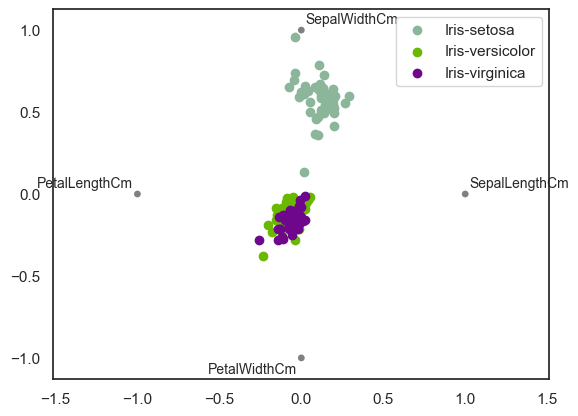

In [ ]:
# Последняя техника многомерной визуализации pandas - это radviz
# Которая помещает каждую характеристику как точку на 2D плоскости, а затем моделирует
# прикрепление каждого образца к этим точкам через пружину, взвешенную
# относительным значением для этой характеристики
from pandas.plotting import radviz
radviz(iris.drop("Id", axis=1), "Species")

## Ячейка 15: RadViz - физическая модель данных

### Теория:
Завершаем изучение многомерной визуализации самым креативным методом.

**1. Физическая модель RadViz:**
- **Пружинная система:** каждый признак = точка на окружности
- **Физическая симуляция:** образец "притягивается" к признакам
- **Сила притяжения:** пропорциональна значению признака
- **Результирующее положение:** баланс всех сил притяжения

**2. Математическая основа:**
- **Нормализация данных:** все значения приводятся к [0,1]
- **Единичная окружность:** признаки равномерно распределены по кругу
- **Векторная сумма:** позиция = сумма векторов × нормализованные значения
- **Центр тяжести:** итоговая позиция образца

**3. Интерпретация RadViz:**
- **Близость к признаку:** высокое значение этого признака
- **Центральное положение:** сбалансированные значения всех признаков
- **Группировка точек:** образцы с похожими профилями
- **Цветовые кластеры:** разделение классов

**4. Уникальные преимущества:**
- **Интуитивная физическая модель:** легко объяснить принцип
- **Компактность:** все данные на одном графике
- **Выявление доминирующих признаков:** по расположению кластеров
- **Красота визуализации:** эстетически привлекательный результат

**5. Ограничения метода:**
- **Зависимость от порядка признаков:** влияет на расположение
- **Потеря информации:** сжатие многомерности в 2D
- **Сложность с многими признаками:** перегрузка визуализации
- **Необходимость нормализации:** требует предобработки данных

**6. Анализ результатов для Iris:**
- **Три кластера:** соответствующие видам ирисов
- **Расположение кластеров:** указывает на доминирующие признаки
- **Компактность групп:** показывает однородность внутри видов
- **Разделимость:** расстояние между кластерами

**7. Практические применения:**
- **Исследовательский анализ:** первичное изучение структуры данных
- **Презентации:** эффектная демонстрация результатов
- **Feature importance:** понимание влияния признаков
- **Validation clustering:** проверка качества группировки

**8. Советы по использованию:**
- **Экспериментируйте с порядком признаков:** разные результаты
- **Комбинируйте с другими методами:** для полной картины
- **Обращайте внимание на выбросы:** точки далеко от кластеров
- **Интерпретируйте осторожно:** метод имеет ограничения

## Заключение лекции: Сводка методов визуализации данных

### Общие выводы:

**1. Прогрессия сложности методов:**
- **Простые графики:** scatter plots, box plots → быстрое понимание
- **Статистические методы:** violin plots, KDE → глубокий анализ распределений
- **Многомерные техники:** pair plots, Andrews curves → комплексное понимание

**2. Выбор подходящего метода:**

| Задача | Рекомендуемый метод | Причина |
|--------|-------------------|---------|
| Корреляция двух переменных | Scatter plot | Простота и ясность |
| Сравнение распределений | Box plot / Violin plot | Статистическая информативность |
| Обзор всех связей | Pair plot | Комплексность анализа |
| Выявление кластеров | Andrews curves / RadViz | Многомерная структура |

**3. Ключевые принципы визуализации:**
- **Простота:** начинайте с простых графиков
- **Прогрессивность:** постепенно усложняйте анализ
- **Сочетание методов:** используйте несколько подходов
- **Интерпретация:** всегда связывайте с доменными знаниями

**4. Технические уроки:**
- **Библиотеки:** pandas для скорости, seaborn для красоты
- **Параметры:** изучайте возможности настройки
- **Обновления:** следите за изменениями API (size → height)
- **Производительность:** учитывайте размер данных

**5. Датасет Iris как учебный пример:**
- **Идеальная сбалансированность:** 50 образцов каждого класса
- **Четкая разделимость:** особенно Iris Setosa
- **Многомерность:** 4 признака для демонстрации техник
- **Классический статус:** стандарт для изучения ML

### Следующие шаги в изучении:
1. **Интерактивная визуализация:** Plotly, Bokeh
2. **Большие данные:** Datashader, HoloViews
3. **Специализированные графики:** Networks, Geographic data
4. **Статистическое моделирование:** Regression plots, Statistical tests
